In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

Метрика: средний доход от пользователя за 1 неделю после первого показа ему рекомендации на 10% (после начала A/B теста время первого показа ищется снова)

Важная информация:
Эксперимент начинается 2023-05-01. Данные есть до 2023-06-01 (но можно завершить раньше, если это позволит оценка длительности)
Вам сказали, что его длительность должна составить 1 месяц.
Все покупки, которые вызваны не влиянием рекомендаций, в этом логе не учитываются

Описание данных:
id_product -  идентификатор продукта, который был рекомендован
is_pay - купил ли пользователь товар
sum_payment - размер платежа (0, если не купил)
city - город, в котором находится пользователь
id_user - пользователь
timestamp - timestamp события
date - дата события

Задачи, которые необходимо решить:
Оценить длительность теста на момент его начала. Сравнить с предложенной. Для оценки необходимо использовать данные с пред экспериментального периода. Посмотреть, есть ли выбросы в данных.
Построить методику расчета целевой метрики. Рассчитать целевую метрику на день окончания теста (рассчитанной в п1) для группы A и B, рассчитать эффект, p_value. Посмотреть, есть ли выбросы в данных.
Рассчитать метрики из п2 по дням и построить их графики.
Принять решение о результате теста - обосновать.

Дополнительно:
При подсчете метрик обработать выбросы в данных - описать почему их можно удалить из теста, если они удаляются. Пожалуйста, не заглядывайте в будущее по данным, если рассчитанная длительность меньше предоставленных данных.

In [8]:
df = pd.read_csv("ab_made_4.gzip", compression='gzip')
df['is_test'] = df['date'].apply(lambda x: x.split('-')[1][1]=='5')
df = df[df['is_pay']==1]
df.head()

,timestamp,id_user,sum_payment,group,city,id_product,is_pay,date,is_test
0,1680330573,user_9903,27,NaN,Санкт-Петербург,4.0,1,2023-04-01,False
3,1680337580,user_3606,12,NaN,Санкт-Петербург,7.0,1,2023-04-01,False
22,1680467515,user_3820,16,NaN,Ярославь,1.0,1,2023-04-02,False
23,1680415665,user_3805,28,NaN,Санкт-Петербург,15.0,1,2023-04-02,False
25,1680424417,user_3254,20,NaN,Рязань,5.0,1,2023-04-02,False


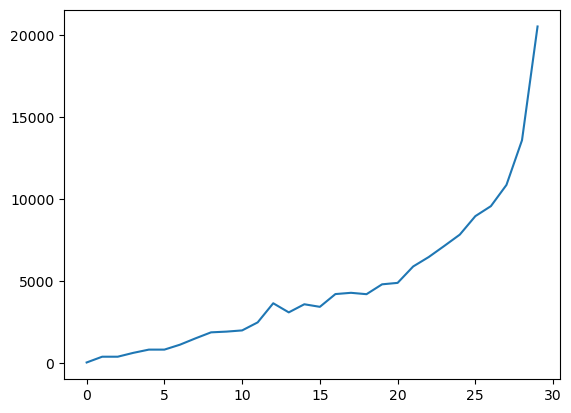

In [9]:
plt.plot(df[df['is_test']==False].groupby('date')['sum_payment'].sum().values)

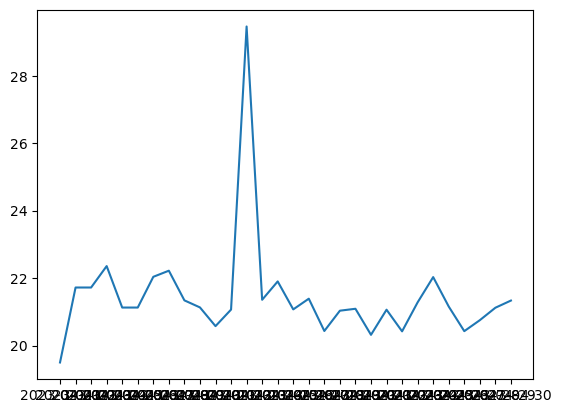

In [15]:
plt.plot(df[df['is_test']==False].groupby('date')['sum_payment'].sum()/df[df['is_test']==False].groupby('date')['id_user'].count())#.values
plt.title('average daily sum_payment')

In [17]:
np.argmax(df[df['is_test']==False].groupby('date')['sum_payment'].sum()/df[df['is_test']==False].groupby('date')['id_user'].count().values)

12

In [21]:
df[df['date']=='2023-04-13']['sum_payment'].mean() 

29.45967741935484

In [22]:
df = df[df['date']!='2023-04-13']

In [25]:
df_train =df[df['is_test']==False] 
df_test = df[df['is_test']==True][df['id_user'].isin(df_train['id_user'].values)]

C:\Users\death\AppData\Local\Temp\ipykernel_3988\616510032.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df[df['is_test']==True][df['id_user'].isin(df_train['id_user'].values)]


C:\Users\death\AppData\Local\Temp\ipykernel_3988\1239120027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['week'] = pd.to_datetime(df_train['date']).apply(lambda x: x.isocalendar()[1])


(array([2.111e+03, 6.040e+02, 4.070e+02, 4.720e+02, 5.220e+02, 6.830e+02,
        1.190e+02, 1.260e+02, 9.700e+01, 6.800e+01, 5.700e+01, 4.600e+01,
        3.500e+01, 1.400e+01, 1.500e+01, 7.000e+00, 8.000e+00, 6.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 10.  ,  15.08,  20.16,  25.24,  30.32,  35.4 ,  40.48,  45.56,
         50.64,  55.72,  60.8 ,  65.88,  70.96,  76.04,  81.12,  86.2 ,
         91.28,  96.36, 101.44, 106.52, 111.6 , 116.68, 121.76, 126.84,
        131.92, 137.  ]),
 <BarContainer object of 25 artists>)

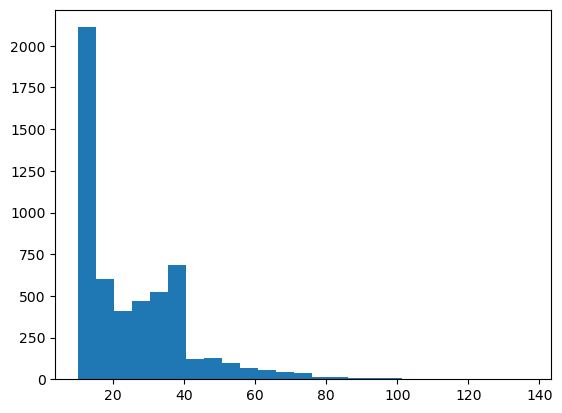

In [77]:
df_train['week'] = pd.to_datetime(df_train['date']).apply(lambda x: x.isocalendar()[1])
plt.hist(df_train.groupby(['week', 'id_user'])['sum_payment'].sum().values, bins=25)

In [26]:
len(df[df['is_test']==True]), len(df_test) # only old users

(9142, 3554)

(array([903., 266., 314., 324., 276.,  99.,  86.,  41.,  31.,  32.,  10.,
         11.,   9.,   2.,   3.,   2.,   1.,   4.,   4.,   0.,   0.,   1.,
          0.,   2.,   2.]),
 array([ 10.  ,  16.72,  23.44,  30.16,  36.88,  43.6 ,  50.32,  57.04,
         63.76,  70.48,  77.2 ,  83.92,  90.64,  97.36, 104.08, 110.8 ,
        117.52, 124.24, 130.96, 137.68, 144.4 , 151.12, 157.84, 164.56,
        171.28, 178.  ]),
 <BarContainer object of 25 artists>)

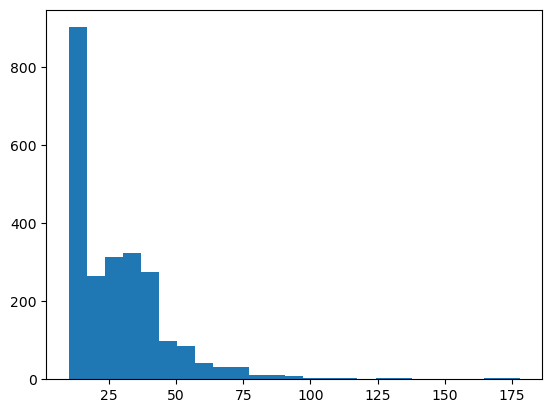

In [78]:
def metric(df):
    dates = df.groupby('id_user')['date'].min()
    dates_begin = pd.DataFrame(dates).reset_index()
    dates_begin.rename(columns={'date': 'start'}, inplace=True)
    dates_begin['end'] = pd.to_datetime(dates_begin['start']).apply(lambda x: x + datetime.timedelta(days=7))
    ddf = df.merge(dates_begin, left_on='id_user', right_on='id_user', how='left')
    return ddf[ddf['date'].between(ddf['start'], ddf['end'])].groupby('id_user')['sum_payment'].sum().reset_index()

m = metric(df_test)
plt.hist(m['sum_payment'].values, bins=25)

In [79]:
weeks_a = df_train.groupby(['week', 'id_user'])['sum_payment'].sum().values
weeks_b = m['sum_payment'].values

In [81]:
np.mean(weeks_b) - np.mean(weeks_a) # effect

2.6219815221893903

In [82]:
from scipy.stats import ttest_ind

In [85]:
ttest_ind(weeks_b, weeks_a, alternative='less')

Ttest_indResult(statistic=6.544972235518408, pvalue=0.9999999999683722)

In [86]:
ttest_ind(weeks_b, weeks_a, alternative='greater') 

Ttest_indResult(statistic=6.544972235518408, pvalue=3.16278186228367e-11)

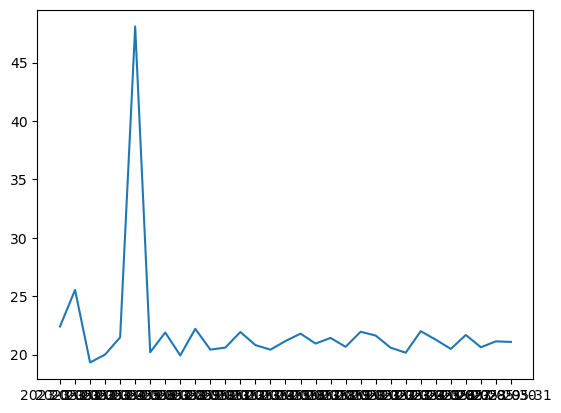

In [119]:
plt.plot(df[df['is_test']==True].groupby('date')['sum_payment'].sum()/df[df['is_test']==True].groupby('date')['id_user'].count())#.values
plt.title('daily average payment')

In [123]:
np.argmax(df[df['is_test']==True].groupby('date')['sum_payment'].sum()/df[df['is_test']==True].groupby('date')['id_user'].count())
df[df['date']=='2023-05-06']['sum_payment'].sum()/df[df['date']=='2023-05-06']['id_user'].count()

48.1

In [127]:
df_test = df_test[df_test['date'] != '2023-05-06']

(array([132., 305., 152.,  84., 105., 109.,  70.,  90.,  33., 222.,  65.,
         55., 127.,  88.,  55.,  12., 124., 159.,  50.,   6.,  49., 131.,
         40.,  27.,  31.,  32.,  30.,  18.,  11.,   2.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <BarContainer object of 30 artists>)

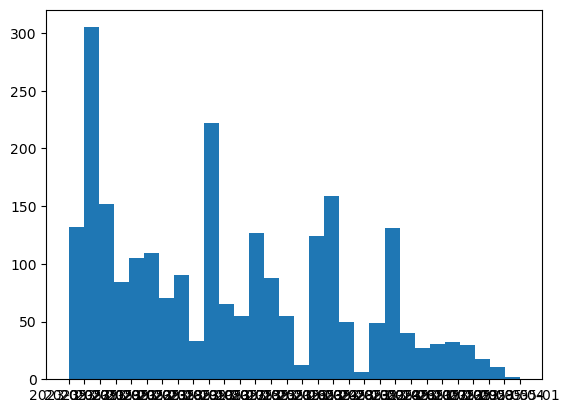

In [128]:
plt.hist(df_test.groupby('id_user')['date'].min().values, bins=30) # Начальные дни для новых людей в эксперименте, т.е
# имеет смысл закончить экперимент через 9 или 16 дней

In [140]:
p_values = []
for d in sorted(list(set(pd.to_datetime(df_test['date']).values))):
    weeks_b = metric(df_test[pd.to_datetime(df_test['date']) <= d])['sum_payment'].values
#     p_values.append(ttest_ind(weeks_b, weeks_a, alternative='greater').pvalue)
    p_values.append(ttest_ind(weeks_b, weeks_a, alternative='two-sided').pvalue)

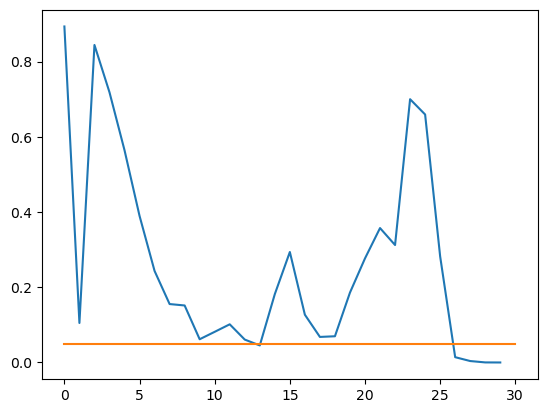

In [141]:
plt.plot(list(range(len(p_values))), p_values)
plt.plot([0, 30], [0.05, 0.05]) # no less 7 days

In [142]:
p_values[8], p_values[15] # более 0.05, отвергать гипотезу, что стало лучше нельзя, но нельзя и отвергнуть альтернативу...

(0.15159532980085888, 0.29378706326136145)

In [150]:
# df_test = df_test[df_test['date'] != '2023-05-06']
# df_test.merge(df_test.groupby('id_user')['date'].min().reset_index(), left_on='id_user', right_on='id_user', how='left')

In [154]:
df_full = pd.read_csv("ab_made_4.gzip", compression='gzip')
df_full['is_test'] = df_full['date'].apply(lambda x: x.split('-')[1][1]=='5')
df_full_train = df_full[df_full['is_test']==False]
sum(df_full_train['is_pay'])/ len(df_full_train) # посмотреть на 600 человек

0.25785162467487094

In [161]:
sum(np.cumsum(df_test.groupby('id_user')['date'].min().reset_index().groupby('date')['id_user'].count().values) < 600)

17

In [165]:
p_values = []
for d in sorted(list(set(pd.to_datetime(df_test['date']).values))):
    weeks_b = metric(df_test[pd.to_datetime(df_test['date']) <= d])['sum_payment'].values
    p_values.append(ttest_ind(weeks_b, weeks_a, alternative='less').pvalue)
#     p_values.append(ttest_ind(weeks_b, weeks_a, alternative='two-sided').pvalue)

In [167]:
p_values[16] # не отвергаем, что хуже (ничего не принимаем) :(

0.06350047120891293